# Stock Price Prediction Exercise

### Study using Linear and Non-Linear Regression methods for short-term Stock Price Forecast

### Author: Gregorio Mendoza Serrano

In this feedback exercise, an analysis of the stock prices of two companies will be performed:

1. `ICAG`: *International Consolidated Airlines Group*, an air transport consortium that brings together airlines such as Iberia, British Airways, Vueling, Level and Aer Lingus.

2. `AIRF`: *Air France KLM Group*, an airline consortium led by Air France and KLM airlines and which is a direct competitor of the ICAG consortium.

Before the analysis, we import the necessary libraries for the correct execution of the code:

In [ ]:
# Importación de librerías usadas en el ejercicio.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy.stats import norm

# Importación de librerías de Sklearn aplicables.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

The following code contains a function to convert numeric volume data from investing.com's own format to float format, which will allow the following sections to be solved.

To do this, we create a new column in the dataframe called 'Vol_Numérico' (Numeric_Vol).

In [ ]:
# Reading of .csv files (ICAG and AIRF Databases):
filename_ICAG = 'ICAG Historical Data.csv'
filename_AIRF = 'AIRF Historical Data.csv'
ICAG = pd.read_csv(filename_ICAG, index_col=0).reset_index()
print('Shape of imported Pandas list ICAG =',ICAG.shape)
AIRF = pd.read_csv(filename_AIRF, index_col=0).reset_index()
print('Shape of imported Pandas list AIRF =',AIRF.shape)

Shape of imported Pandas list ICAG = (1217, 7)
Shape of imported Pandas list AIRF = (1219, 7)


# Part 1

*Extract the Date, Price, Open, High, Low, Vol. and Change % fields from investing.com related to a stock that is of interest to you.
The time range will be the following:*

*From: January 1, 2019 - To: October 1, 2023*

**a.** *From the text file downloaded from investing.com, create a dataframe with that data and study its contents using python pandas functions.
That content study should include:*
- *the first rows of the dataframe*
- *the last rows of the dataframe*
- *the index you use*
- *the columns the dataframe has*

Below we extract the data required by the statement, both for ICAG and for the competitor AIRF:

In [ ]:
# Mostrar las primeras filas del DataFrame
print("Primeras filas del DataFrame ICAG:")
print(ICAG.head())
print('')
print("Primeras filas del DataFrame AIRF:")
print(AIRF.head())
print('')

# Mostrar las últimas filas del DataFrame
print("\nÚltimas filas del DataFrame ICAG:")
print(ICAG.tail())
print('')
# Mostrar las últimas filas del DataFrame
print("\nÚltimas filas del DataFrame AIRF:")
print(AIRF.tail())
print('')

# Mostrar el índice del DataFrame
print("\nÍndice del DataFrame ICAG:")
print(ICAG.index)
print('')
# Mostrar el índice del DataFrame
print("\nÍndice del DataFrame AIRF:")
print(AIRF.index)
print('')

# Mostrar las columnas del DataFrame
print("\nColumnas del DataFrame ICAG:")
print(ICAG.columns)
print('')
print("\nColumnas del DataFrame AIRF:")
print(AIRF.columns)
print('')


Primeras filas del DataFrame ICAG:
         Date  Price   Open   High    Low    Vol. Change %
0  09/29/2023  1.707  1.712  1.730  1.707   7.01M    0.03%
1  09/28/2023  1.706  1.709  1.713  1.660  16.06M   -0.64%
2  09/27/2023  1.717  1.700  1.733  1.697   7.59M    0.62%
3  09/26/2023  1.707  1.689  1.723  1.681   8.93M    0.56%
4  09/25/2023  1.697  1.748  1.753  1.688  16.70M   -3.03%

Primeras filas del DataFrame AIRF:
         Date  Price   Open   High    Low   Vol. Change %
0  09/29/2023  11.90  11.86  12.03  11.83  1.13M    0.20%
1  09/28/2023  11.87  11.64  11.87  11.27  2.10M    1.38%
2  09/27/2023  11.71  11.68  11.82  11.57  1.32M    0.10%
3  09/26/2023  11.70  11.77  11.92  11.62  1.40M   -1.10%
4  09/25/2023  11.83  12.23  12.35  11.73  2.27M   -3.65%


Últimas filas del DataFrame ICAG:
            Date  Price   Open   High    Low   Vol. Change %
1212  01/08/2019  4.401  4.431  4.452  4.342  4.76M    0.05%
1213  01/07/2019  4.399  4.391  4.457  4.374  2.12M    0.73%
1214  01

**b.** *Create a dataframe based on the initial dataframe but only with the data related to trading days where the trading volume exceeded 50% of the average across all days.*

**c.** *Create a .csv file with this newly constructed dataframe.*

Below is the resulting dataframe, its first rows, and the extraction of results:
The following code contains a function to convert the volume data, in numeric format from investing.com, to a float format, which will allow the resolution of the following sections.

To do this, we create a new column in the dataframe called 'Vol_Numeric'.

In [ ]:
def convertir_a_numero(cadena):
    # Verificar si la cadena ya es un número
    if isinstance(cadena, (int, float)):
        return float(cadena)

    # Definir un diccionario de sufijos y sus factores multiplicadores
    sufijos = {'K': 1e3, 'M': 1e6, 'B': 1e9, 'T': 1e12}

    # Extraer el sufijo y el número como cadena
    sufijo = cadena[-1]
    numero_str = cadena[:-1]

    # Convertir el número a float y multiplicar por el factor correspondiente al sufijo
    if sufijo in sufijos:
        factor = sufijos[sufijo]
        numero_float = float(numero_str) * factor
        return numero_float
    else:
        # Si no hay sufijo, simplemente convertir la cadena a float
        return float(cadena)

# Aplicar la función a la columna del DataFrame de ICAG
ICAG['Vol_Numérico'] = ICAG['Vol.'].apply(convertir_a_numero)
# Aplicar la función a la columna del DataFrame de AIRF
AIRF['Vol_Numérico'] = AIRF['Vol.'].apply(convertir_a_numero)

# Calcular la media del volumen de negociación
media_vol = ICAG['Vol_Numérico'].mean()

# Filtrar el DataFrame para incluir solo los días con volumen superior al 50% de la media
ICAG_filtrado = ICAG[ICAG['Vol_Numérico'] > 0.5 * media_vol]

# Mostrar las primeras filas del DataFrame filtrado
print("Primeras filas del DataFrame filtrado:")
print(ICAG_filtrado.head())

Primeras filas del DataFrame filtrado:
         Date  Price   Open   High    Low    Vol. Change %  Vol_Numérico
1  09/28/2023  1.706  1.709  1.713  1.660  16.06M   -0.64%    16060000.0
2  09/27/2023  1.717  1.700  1.733  1.697   7.59M    0.62%     7590000.0
3  09/26/2023  1.707  1.689  1.723  1.681   8.93M    0.56%     8930000.0
4  09/25/2023  1.697  1.748  1.753  1.688  16.70M   -3.03%    16700000.0
5  09/22/2023  1.750  1.751  1.758  1.725   8.85M   -0.37%     8850000.0


Extraction of a new .csv file with the filtered dataframe from section b:

In [ ]:
ICAG_filtrado.to_csv('ICAG_filtrado.csv', index=False)

**d.** *Create a plot with the columns Price, Open, High, and Low for all the trading days from the downloaded data.*

**e.** *Plot each graph in a different color and create the corresponding legend. Important: the legend should not obscure any part of the graph.*

**f.** *Also configure the appropriate x and y axes, the title of the plot, and its units.*

Below is the plot with the stock price variables for ICAG shares:

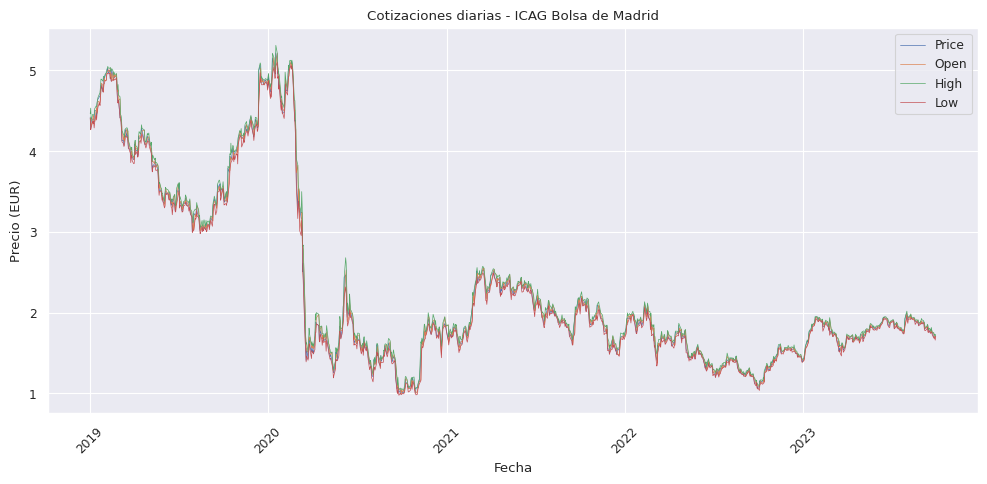

In [ ]:
# Asegúrate de que la columna Date esté en formato de fecha
ICAG['Date'] = pd.to_datetime(ICAG['Date'], format='%m/%d/%Y')

# Ordenar el DataFrame por la columna Date
ICAG.sort_values('Date', inplace=True)

# Crear el gráfico
plt.figure(figsize=(12, 5))

# Agregar las líneas para Price, Open, High y Low
plt.plot(ICAG['Date'], ICAG['Price'], label='Price', linewidth=0.5)
plt.plot(ICAG['Date'], ICAG['Open'], label='Open', linewidth=0.5)
plt.plot(ICAG['Date'], ICAG['High'], label='High', linewidth=0.5)
plt.plot(ICAG['Date'], ICAG['Low'], label='Low', linewidth=0.5)

# Personalizar el gráfico
plt.title('Cotizaciones diarias - ICAG Bolsa de Madrid')
plt.xlabel('Fecha')
plt.ylabel('Precio (EUR)')
plt.legend()
plt.grid(True)

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.savefig('Cotizaciones_ICAG.png')
plt.show()

# Part 2

**a.** *Using the same initial dataframe with all the stock quotes, now create a histogram with the daily trading volume.*

**b.** *Create another histogram with the daily percentage change in stock price.*

**c.** *Add sufficient information to the graph (legend, axes, title, colors).*

Below are the histograms of trading volume and daily percentage change in stock price for ICAG shares.

<ipython-input-53-327cd2ce79b3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICAG['Date'] = pd.to_datetime(ICAG['Date'], format='%m/%d/%Y')
<ipython-input-53-327cd2ce79b3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICAG.sort_values('Date', inplace=True)
<ipython-input-53-327cd2ce79b3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

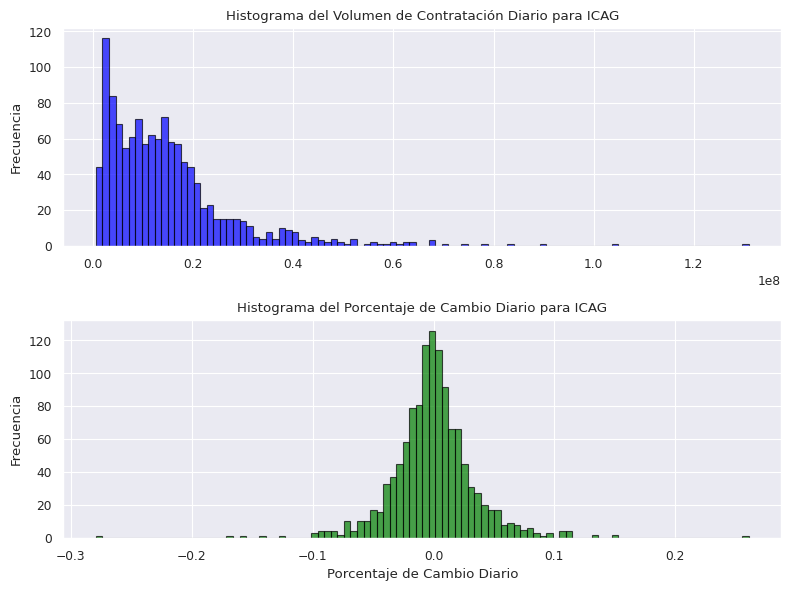

In [ ]:
# Eliminamos los valores NaN contenidos en el dataframe ICAG:
ICAG = ICAG.dropna()

# Convertir la columna 'Date' al formato de fecha reconocido
ICAG['Date'] = pd.to_datetime(ICAG['Date'], format='%m/%d/%Y')

# Ordenar el DataFrame por la columna Date
ICAG.sort_values('Date', inplace=True)

# Lectura del porcentaje de cambio diario
ICAG['Daily_Percentage_Change'] = ICAG['Change %'].str.replace('%', '').astype(float) / 100.0

# Crear el gráfico de histogramas con subgráficos
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 1]})

# Histograma del Volumen de Contratación Diario
ax1.hist(ICAG['Vol_Numérico'], bins=100, color='blue', edgecolor='black', alpha=0.7)
ax1.set_title('Histograma del Volumen de Contratación Diario para ICAG')
ax1.set_ylabel('Frecuencia')

# Histograma del Porcentaje de Cambio Diario
ax2.hist(ICAG['Daily_Percentage_Change'].dropna(), bins=100, color='green', edgecolor='black', alpha=0.7)
ax2.set_title('Histograma del Porcentaje de Cambio Diario para ICAG')
ax2.set_xlabel('Porcentaje de Cambio Diario')
ax2.set_ylabel('Frecuencia')

# Ajustes adicionales
plt.tight_layout()

# Mostrar el gráfico
plt.savefig('Histogramas_ICAG.png')
plt.show()

Below are the histograms of trading volume and daily percentage change in stock price for AIRF shares.

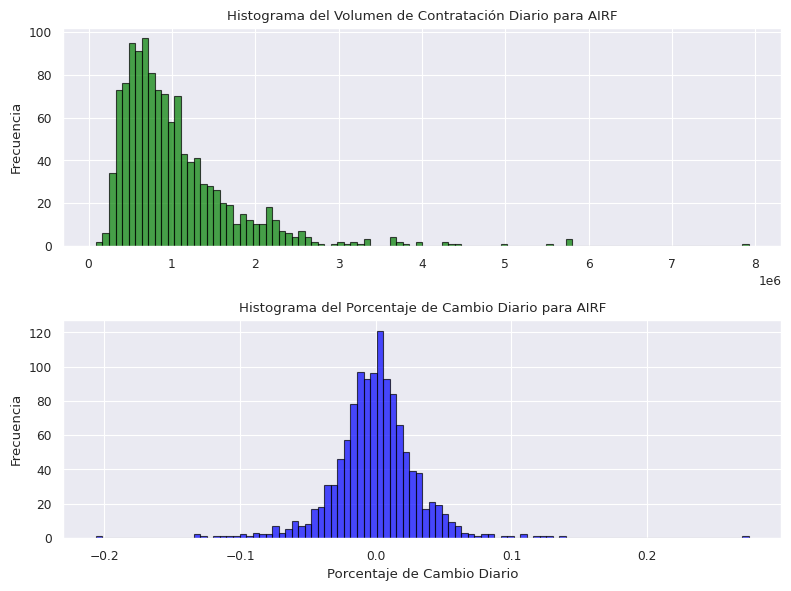

In [ ]:
# Convertir la columna 'Date' al formato de fecha reconocido
AIRF['Date'] = pd.to_datetime(AIRF['Date'], format='%m/%d/%Y')

# Ordenar el DataFrame por la columna Date
AIRF.sort_values('Date', inplace=True)

# Calcular el porcentaje de cambio diario
AIRF['Daily_Percentage_Change'] = AIRF['Change %'].str.replace('%', '').astype(float) / 100.0

# Crear el gráfico de histogramas con subgráficos
fig, (ax3, ax4) = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 1]})

# Histograma del Volumen de Contratación Diario
ax3.hist(AIRF['Vol_Numérico'], bins=100, color='green', edgecolor='black', alpha=0.7)
ax3.set_title('Histograma del Volumen de Contratación Diario para AIRF')
ax3.set_ylabel('Frecuencia')

# Histograma del Porcentaje de Cambio Diario
ax4.hist(AIRF['Daily_Percentage_Change'].dropna(), bins=100, color='blue', edgecolor='black', alpha=0.7)
ax4.set_title('Histograma del Porcentaje de Cambio Diario para AIRF')
ax4.set_xlabel('Porcentaje de Cambio Diario')
ax4.set_ylabel('Frecuencia')

# Ajustes adicionales
plt.tight_layout()

# Mostrar el gráfico
plt.savefig('Histogramas_AIRF.png')
plt.show()

**d.** *Create two new histograms. In both histograms, include the same information about your stock (steps a, b, and c of this part 2), but now also include the same data from another stock belonging to a competitor of the first stock you chose.*

**e.** *Add sufficient information to the graph (legend, axes, title, colors).*

**f.** *Write a brief paragraph with your conclusions about the created histograms as a comment.*

Below are the superimposed histograms that were produced in the previous section:

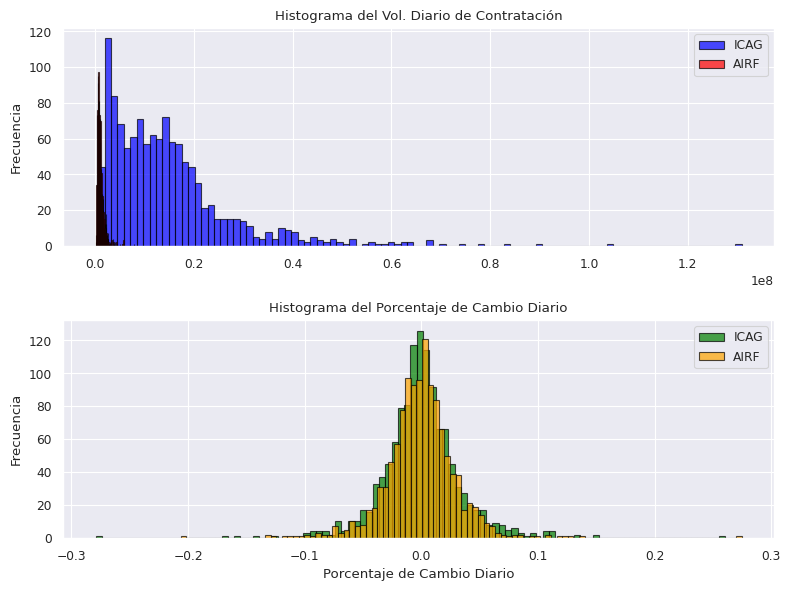

In [ ]:
# Crear los gráficos de histogramas con subgráficos
fig, (ax5, ax6) = plt.subplots(2, 1, figsize=(8,6), gridspec_kw={'height_ratios': [1, 1]})

# Histograma del Vol_Numérico de Contratación Diario para ICAG)
ax5.hist(ICAG['Vol_Numérico'], bins=100, color='blue', edgecolor='black', alpha=0.7, label='ICAG')
ax5.hist(AIRF['Vol_Numérico'], bins=100, color='red', edgecolor='black', alpha=0.7, label='AIRF')
ax5.set_title('Histograma del Vol. Diario de Contratación')
ax5.set_ylabel('Frecuencia')
ax5.legend()
ax5.set_xscale('linear')

# Histograma del Porcentaje de Cambio Diario para ICAG
ax6.hist(ICAG['Daily_Percentage_Change'], bins=100, color='green', edgecolor='black', alpha=0.7, label='ICAG')
ax6.hist(AIRF['Daily_Percentage_Change'], bins=100, color='orange', edgecolor='black', alpha=0.7, label='AIRF')
ax6.set_title('Histograma del Porcentaje de Cambio Diario')
ax6.set_xlabel('Porcentaje de Cambio Diario')
ax6.set_ylabel('Frecuencia')
ax6.legend()

# Ajustes adicionales
plt.tight_layout()

# Mostrar el gráfico
plt.savefig('Histogramas_Superpuestos.png')
plt.show()

Note: The superimposed numerical volume histogram contains two magnitudes that are in different max/min ranges, which makes the superimposed visualization not optimal (the maximum volume of AIRF shares is much lower). This gives us an idea that the ICAG stock is much more popular (in terms of trading volume) than AIRF stock, which should not be confused with a greater desire to buy the shares (this would be reflected in the price).

The daily trading volume diagram for AIRF can be found in the previous section for optimal visualization.

Regarding the daily percentage change, we can see that both histograms are quite centered, with AIRF's median being slightly higher, indicating slightly higher volatility. Visually, the standard deviation of both histograms is very similar.

# Part 3

**a.** *Using scipy, calculate the PDF and CDF functions of the four histograms you created in part 2.*

**b.** *Plot these 4 functions in two distinct graphs, one with the two PDFs and the other with the two CDFs.*

**c.** *Write a few brief lines with your statistical conclusions.*

Below are the PDF and CDF functions of the Daily Trading Volume histograms for ICAG and AIRF stocks:

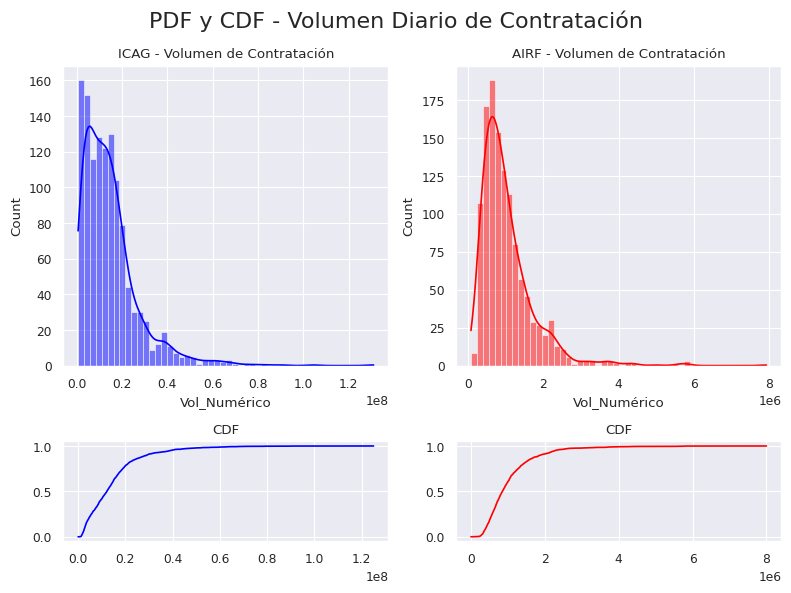

In [ ]:
# Configuración de estilos
sns.set_theme()
sns.set_context("paper")

# Crear los gráficos de histogramas con subgráficos compartiendo el eje X
fig, axes = plt.subplots(2, 2, figsize=(8, 6), sharex=False, gridspec_kw={'height_ratios': [3, 1]})
fig.suptitle('PDF y CDF - Volumen Diario de Contratación', fontsize=16)

# Líneas de comando para la creación de los diagramas acumulativos CDF de AIRF:
hist_ICAG = np.histogram(ICAG['Vol_Numérico'], bins=500)
hist_dist_ICAG = scipy.stats.rv_histogram(hist_ICAG, density=False)
X_ICAG = np.linspace(0.0, 1.25e8, 500)

# Líneas de comando para la creación de los diagramas acumulativos CDF de AIRF:
hist_AIRF = np.histogram(AIRF['Vol_Numérico'], bins=500)
hist_dist_AIRF = scipy.stats.rv_histogram(hist_AIRF, density=False)
X_AIRF = np.linspace(0.0, 8e6, 500)

# Histograma y ajuste de la PDF y CDF para ICAG - Volumen de Contratación
sns.histplot(ICAG['Vol_Numérico'], bins=50, kde=True, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('ICAG - Volumen de Contratación')
axes[1, 0].plot(X_ICAG, hist_dist_ICAG.cdf(X_ICAG), color='blue')
axes[1, 0].set_title('CDF')

# Histograma y ajuste de la PDF y CDF para AIRF - Volumen de Contratación
sns.histplot(AIRF['Vol_Numérico'], bins=50, kde=True, color='red', ax=axes[0, 1])
axes[0, 1].set_title('AIRF - Volumen de Contratación')
axes[1, 1].plot(X_AIRF, hist_dist_AIRF.cdf(X_AIRF), color='red')
axes[1, 1].set_title('CDF')

# Ajustes adicionales
plt.tight_layout(rect=[0, 0,1,1])

# Mostrar el gráfico
plt.savefig('PDF_CDF_VolContratacion.png')
plt.show()

The histograms of the daily trading volume suggest greater popularity of ICAG shares compared to AIRF shares (observe the X-axis scale of the graphs).

The corresponding CDF diagrams suggest that, with near certainty, the daily volumes are equal to or less than 4e7 for ICAG shares and 3e6 for AIRF shares.

Below are the PDF and CDF functions of the Daily Trading Volume histograms for ICAG and AIRF shares:

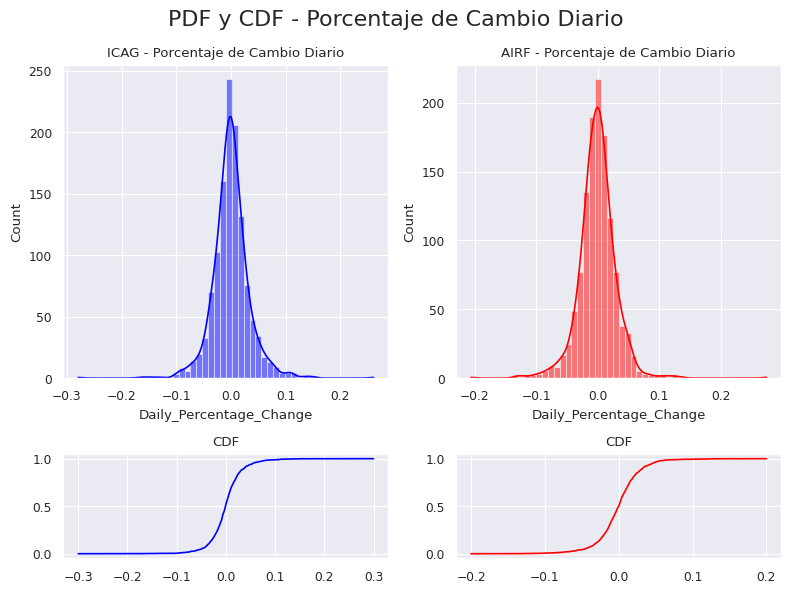

In [ ]:
# Configuración de estilos
sns.set_theme()
sns.set_context("paper")

# Crear los gráficos de histogramas con subgráficos compartiendo el eje X
fig, axes = plt.subplots(2, 2, figsize=(8, 6), sharex=False, gridspec_kw={'height_ratios': [3, 1]})
fig.suptitle('PDF y CDF - Porcentaje de Cambio Diario', fontsize=16)

# Líneas de comando para la creación de los diagramas acumulativos CDF de AIRF:
hist_ICAG = np.histogram(ICAG['Daily_Percentage_Change'], bins=500)
hist_dist_ICAG = scipy.stats.rv_histogram(hist_ICAG, density=False)
X_ICAG = np.linspace(-0.3, 0.3, 500)

# Líneas de comando para la creación de los diagramas acumulativos CDF de AIRF:
hist_AIRF = np.histogram(AIRF['Daily_Percentage_Change'], bins=500)
hist_dist_AIRF = scipy.stats.rv_histogram(hist_AIRF, density=False)
X_AIRF = np.linspace(-0.2, 0.2, 500)

# Histograma y ajuste de la PDF y CDF para ICAG - Volumen de Contratación
sns.histplot(ICAG['Daily_Percentage_Change'], bins=50, kde=True, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('ICAG - Porcentaje de Cambio Diario')
axes[1, 0].plot(X_ICAG, hist_dist_ICAG.cdf(X_ICAG), color='blue')
axes[1, 0].set_title('CDF')

# Histograma y ajuste de la PDF y CDF para AIRF - Volumen de Contratación
sns.histplot(AIRF['Daily_Percentage_Change'], bins=50, kde=True, color='red', ax=axes[0, 1])
axes[0, 1].set_title('AIRF - Porcentaje de Cambio Diario')
axes[1, 1].plot(X_AIRF, hist_dist_AIRF.cdf(X_AIRF), color='red')
axes[1, 1].set_title('CDF')

# Ajustes adicionales
plt.tight_layout(rect=[0, 0,1,1])

# Mostrar el gráfico
plt.savefig('PDF_CDF_CambioDiario.png')
plt.show()

In the case of daily price change, we can observe that both PDFs are centered around zero (as well as the midpoint of the CDF sigmoid), indicating that the most probable daily changes are very small.

As for the skewness level of both curves, they correspond to a neutral market risk level.

# Part 4

**a.** *Now play the role of a future predictor. From all the stock data you have, consider the first 80% of it as training data and the most recent 20% as test data. In this context, use a model from scikit-learn to try to model the price function of your stock. A linear model, while not necessarily accurate, is also valid. Feel free to use a more advanced model provided by scikit-learn.*

**b.** *Calculate the error of the model used.*

To extract the prediction of future data for ICAG and AIRF stocks, we will use two models from the Sklearn library: `LinearRegression()` and `RandomForestRegressor()`. The results of the training and test sets will be plotted along with the predictions for both sets, and as an indicator of fit, we will calculate the MSE (Mean Squared Error) and the R2 score to determine the quality of the fit on the test prediction.

First, we will sort the ICAG and AIRF dataframes in ascending order by date:

In [ ]:
ICAG=ICAG.sort_values('Date', ascending=True)
AIRF=AIRF.sort_values('Date', ascending=True)
ICAG = ICAG.reset_index(drop=True)
AIRF = AIRF.reset_index(drop=True)

Let's make the prediction for ICAG shares:


RENDIMIENTO DEL MODELO LINEAL:
MSE en conjunto de entrenamiento: 0.0006337651751352048
MSE en conjunto de test: 0.0001126248233212118
R2 en conjunto de prueba: 0.995994662019615

RENDIMIENTO DEL MODELO NO LINEAL:
MSE en conjunto de entrenamiento: 0.0001709788324074075
MSE en conjunto de test: 0.00017583265368853018
R2 en conjunto de prueba: 0.9937467674954574



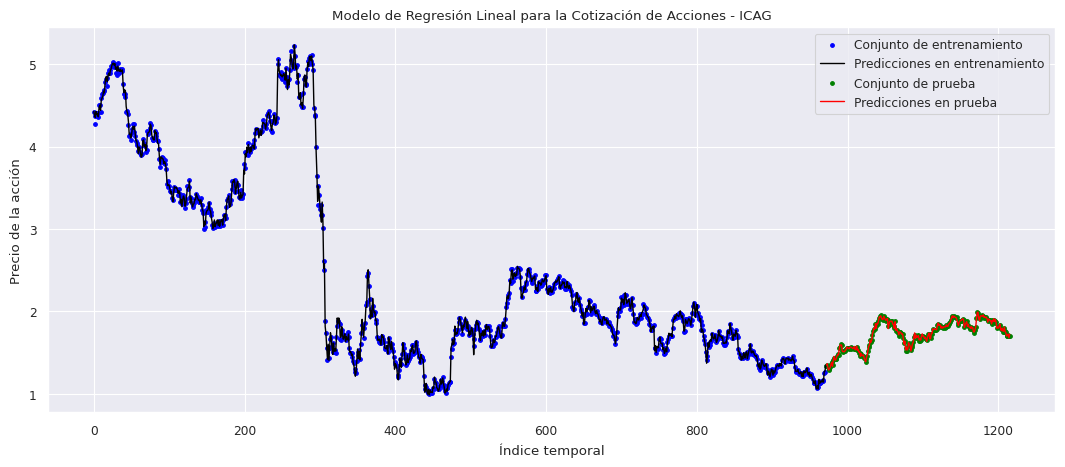

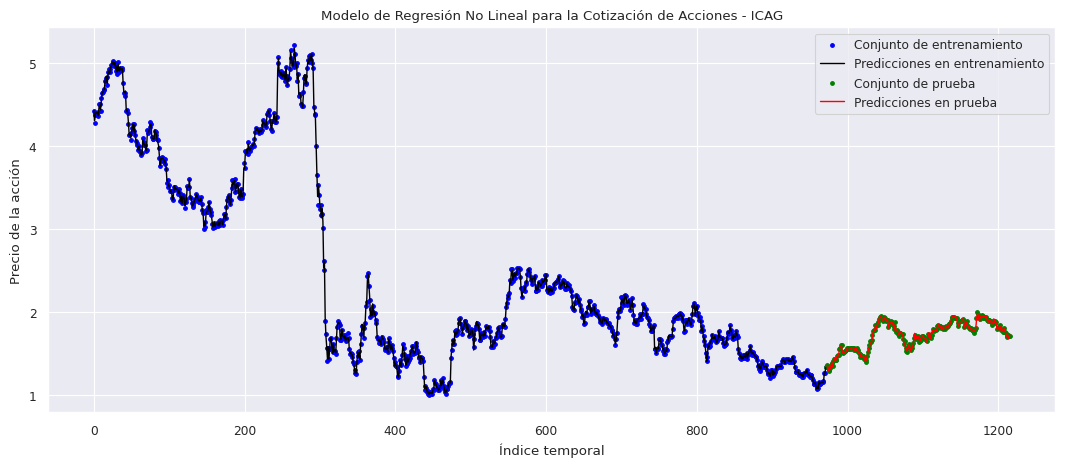

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
ICAG_X = ICAG.drop(['Date', 'Price', 'Vol.','Change %','Vol_Numérico'], axis=1)
ICAG_y = ICAG['Price']
train_size = int(0.8 * len(ICAG))
total_size = int(len(ICAG))
X_train, X_test = ICAG_X[:train_size], ICAG_X[train_size:]

# Crear matrices de características (X) y variables objetivo (y) para entrenamiento y prueba
y_train = ICAG_y[:train_size].values
y_test = ICAG_y[train_size:].values

# Crear y entrenar el modelo de regresión no lineal RandomForestRegressor
model_linear = LinearRegression()
model_nonlinear = RandomForestRegressor()

# Realizar predicciones en los conjuntos de entrenamiento y prueba
model_linear.fit(X_train, y_train)
model_nonlinear.fit(X_train, y_train)
y_test_pred = model_linear.predict(X_test)
y_train_pred = model_linear.predict(X_train)
y_test_pred_NL = model_nonlinear.predict(X_test)
y_train_pred_NL = model_nonlinear.predict(X_train)

# Evaluar el rendimiento del modelo LINEAL en términos de error cuadrático medio (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f'RENDIMIENTO DEL MODELO LINEAL:')
print(f'MSE en conjunto de entrenamiento: {mse_train}')
print(f'MSE en conjunto de test: {mse_test}')
print(f'R2 en conjunto de prueba: {r2}')
print(f'')

# Evaluar el rendimiento del modelo NO LINEAL en términos de error cuadrático medio (MSE)
mse_train = mean_squared_error(y_train, y_train_pred_NL)
mse_test = mean_squared_error(y_test, y_test_pred_NL)
r2 = r2_score(y_test, y_test_pred_NL)

print(f'RENDIMIENTO DEL MODELO NO LINEAL:')
print(f'MSE en conjunto de entrenamiento: {mse_train}')
print(f'MSE en conjunto de test: {mse_test}')
print(f'R2 en conjunto de prueba: {r2}')
print(f'')

X_train_val = np.array(X_train.index).reshape(-1, 1)
X_test_val = np.array(X_test.index).reshape(-1, 1)

plt.figure(figsize=(13, 5))
# Conjunto de entrenamiento
plt.scatter(X_train_val, y_train, label='Conjunto de entrenamiento', color='blue',s=7)
plt.plot(X_train_val, y_train_pred, label='Predicciones en entrenamiento', color='black', linewidth=1)

# Conjunto de prueba
plt.scatter(X_test_val, y_test, label='Conjunto de prueba', color='green',s=7,marker='o')
plt.plot(X_test_val, y_test_pred, label='Predicciones en prueba', color='red', linewidth=1)

plt.title('Modelo de Regresión Lineal para la Cotización de Acciones - ICAG')
plt.xlabel('Índice temporal')
plt.ylabel('Precio de la acción')
plt.legend()
plt.savefig('ICAG_PrediccionLineal.png')
plt.show()

print('')

plt.figure(figsize=(13, 5))
# Conjunto de entrenamiento
plt.scatter(X_train_val, y_train, label='Conjunto de entrenamiento', color='blue',s=7)
plt.plot(X_train_val, y_train_pred_NL, label='Predicciones en entrenamiento', color='black', linewidth=1)

# Conjunto de prueba
plt.scatter(X_test_val, y_test, label='Conjunto de prueba', color='green',s=7,marker='o')
plt.plot(X_test_val, y_test_pred_NL, label='Predicciones en prueba', color='red', linewidth=1)

plt.title('Modelo de Regresión No Lineal para la Cotización de Acciones - ICAG')
plt.xlabel('Índice temporal')
plt.ylabel('Precio de la acción')
plt.legend()
plt.savefig('ICAG_PrediccionNoLineal.png')
plt.show()

The model achieves an acceptable level of error for both the linear and nonlinear models, as well as the R2 score (coefficient of determination). We can conclude that both approaches are, roughly speaking, equally good.

Upon more detailed observation, the linear regression achieves a fit with less variance in the test results.

The reason the prediction error is so small may lie in the nature of the test set itself. Looking at the graph above, we can see that the test zone corresponds to a period where the market did not experience unexpected external phenomena (e.g., the onset of the Covid-19 pandemic), so price variations are driven by the internal mechanics of the market, which can be replicated by a properly trained regression model.

Had there been crises or external events, the model's error would have been much higher, as the model would not have been sufficiently trained to predict or replicate their behavior.

Next, we apply the same procedure to predict the prices for AIRF shares:

RENDIMIENTO DEL MODELO LINEAL:
MSE en conjunto de entrenamiento: 0.11051062154981196
MSE en conjunto de test: 0.021085308403480833
R2 en conjunto de prueba: 0.9930133903117293

RENDIMIENTO DEL MODELO NO LINEAL:
MSE en conjunto de entrenamiento: 0.028006164389743765
MSE en conjunto de test: 0.03611233372950895
R2 en conjunto de prueba: 0.9880341906377333



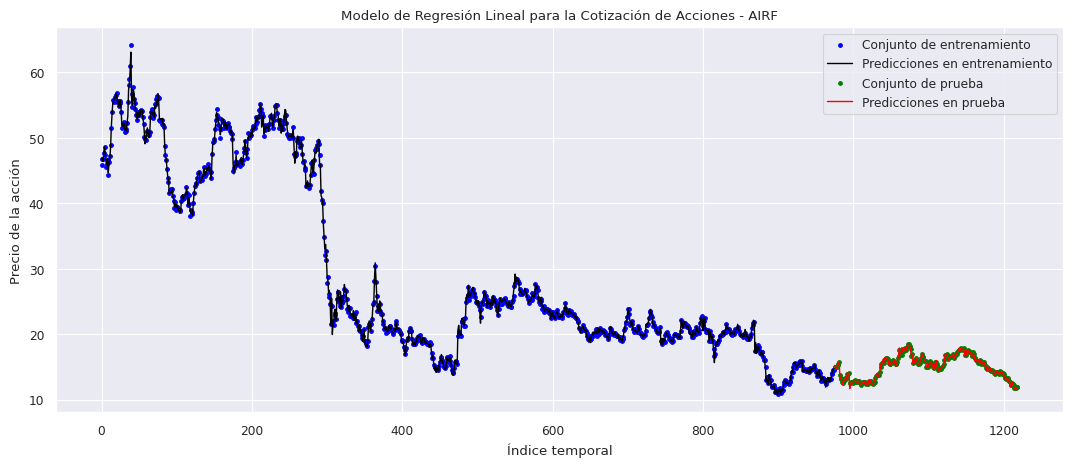

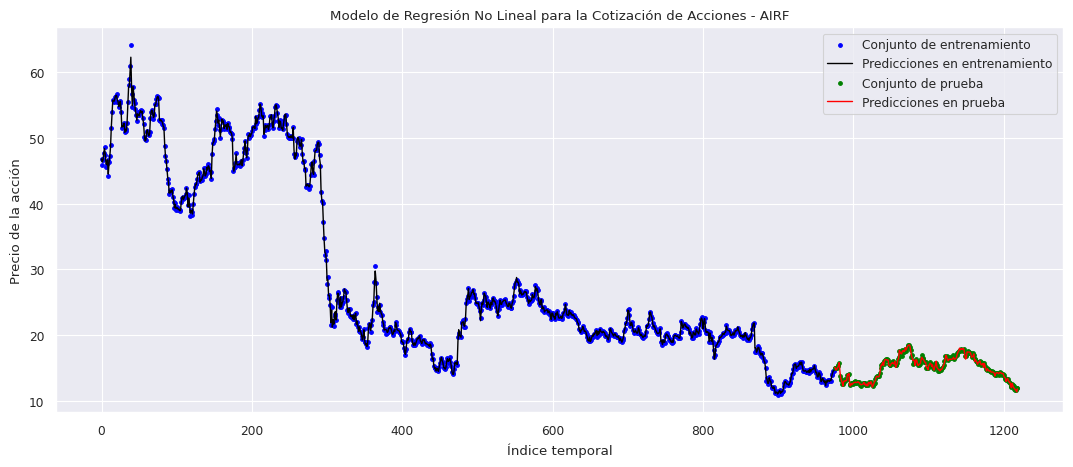

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
AIRF_X = AIRF.drop(['Date', 'Price', 'Vol.','Change %','Vol_Numérico'], axis=1)
AIRF_y = AIRF['Price']
train_size = int(0.8 * len(AIRF))
total_size = int(len(AIRF))
X_train, X_test = AIRF_X[:train_size], AIRF_X[train_size:]

# Crear matrices de características (X) y variables objetivo (y) para entrenamiento y prueba
y_train = AIRF_y[:train_size].values
y_test = AIRF_y[train_size:].values

# Crear y entrenar el modelo de regresión no lineal RandomForestRegressor
model_linear = LinearRegression()
model_nonlinear = RandomForestRegressor()

# Realizar predicciones en los conjuntos de entrenamiento y prueba
model_linear.fit(X_train, y_train)
model_nonlinear.fit(X_train, y_train)
y_test_pred = model_linear.predict(X_test)
y_train_pred = model_linear.predict(X_train)
y_test_pred_NL = model_nonlinear.predict(X_test)
y_train_pred_NL = model_nonlinear.predict(X_train)

# Evaluar el rendimiento del modelo LINEAL en términos de error cuadrático medio (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f'RENDIMIENTO DEL MODELO LINEAL:')
print(f'MSE en conjunto de entrenamiento: {mse_train}')
print(f'MSE en conjunto de test: {mse_test}')
print(f'R2 en conjunto de prueba: {r2}')
print(f'')

# Evaluar el rendimiento del modelo NO LINEAL en términos de error cuadrático medio (MSE)
mse_train = mean_squared_error(y_train, y_train_pred_NL)
mse_test = mean_squared_error(y_test, y_test_pred_NL)
r2 = r2_score(y_test, y_test_pred_NL)

print(f'RENDIMIENTO DEL MODELO NO LINEAL:')
print(f'MSE en conjunto de entrenamiento: {mse_train}')
print(f'MSE en conjunto de test: {mse_test}')
print(f'R2 en conjunto de prueba: {r2}')
print(f'')

X_train_val = np.array(X_train.index).reshape(-1, 1)
X_test_val = np.array(X_test.index).reshape(-1, 1)

plt.figure(figsize=(13, 5))
# Conjunto de entrenamiento
plt.scatter(X_train_val, y_train, label='Conjunto de entrenamiento', color='blue',s=7)
plt.plot(X_train_val, y_train_pred, label='Predicciones en entrenamiento', color='black', linewidth=1)

# Conjunto de prueba
plt.scatter(X_test_val, y_test, label='Conjunto de prueba', color='green',s=7,marker='o')
plt.plot(X_test_val, y_test_pred, label='Predicciones en prueba', color='red', linewidth=1)

plt.title('Modelo de Regresión Lineal para la Cotización de Acciones - AIRF')
plt.xlabel('Índice temporal')
plt.ylabel('Precio de la acción')
plt.legend()
plt.savefig('AIRF_PrediccionLineal.png')
plt.show()

print('')

plt.figure(figsize=(13, 5))
# Conjunto de entrenamiento
plt.scatter(X_train_val, y_train, label='Conjunto de entrenamiento', color='blue',s=7)
plt.plot(X_train_val, y_train_pred_NL, label='Predicciones en entrenamiento', color='black', linewidth=1)

# Conjunto de prueba
plt.scatter(X_test_val, y_test, label='Conjunto de prueba', color='green',s=7,marker='o')
plt.plot(X_test_val, y_test_pred_NL, label='Predicciones en prueba', color='red', linewidth=1)

plt.title('Modelo de Regresión No Lineal para la Cotización de Acciones - AIRF')
plt.xlabel('Índice temporal')
plt.ylabel('Precio de la acción')
plt.legend()
plt.savefig('AIRF_PrediccionNoLineal.png')
plt.show()
#print(y_test_pred)

The conclusions of both predictions are the same as those explained for ICAG in terms of the model's accuracy in predicting the test set.

However, a higher mean squared error is observed in the case of predicting AIRF stock prices. This may be caused by higher 'short-term' volatility in AIRF's stock price. The randomness of this volatility negatively affects the predictive ability of the model.